In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('creditcard.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49610 entries, 0 to 49609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    49610 non-null  int64  
 1   V1      49610 non-null  float64
 2   V2      49610 non-null  float64
 3   V3      49610 non-null  float64
 4   V4      49609 non-null  float64
 5   V5      49609 non-null  float64
 6   V6      49609 non-null  float64
 7   V7      49609 non-null  float64
 8   V8      49609 non-null  float64
 9   V9      49609 non-null  float64
 10  V10     49609 non-null  float64
 11  V11     49609 non-null  float64
 12  V12     49609 non-null  float64
 13  V13     49609 non-null  float64
 14  V14     49609 non-null  float64
 15  V15     49609 non-null  float64
 16  V16     49609 non-null  float64
 17  V17     49609 non-null  float64
 18  V18     49609 non-null  float64
 19  V19     49609 non-null  float64
 20  V20     49609 non-null  float64
 21  V21     49609 non-null  float64
 22

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49610.000000,49610.000000,49610.000000,49610.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,...,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000
mean,28803.556239,-0.242569,0.012235,0.693009,0.185186,-0.257016,0.104114,-0.120255,0.053442,0.123490,...,-0.028396,-0.107154,-0.040123,0.007997,0.135954,0.020813,0.004792,0.004533,93.120688,0.002983
std,13097.468525,1.885867,1.630704,1.510559,1.400175,1.413057,1.310705,1.283507,1.224245,1.213441,...,0.736050,0.637733,0.590810,0.594121,0.439067,0.501438,0.388364,0.333225,253.265971,0.054539
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21734.250000,-0.992845,-0.562967,0.217605,-0.720957,-0.866471,-0.635669,-0.605928,-0.146749,-0.611499,...,-0.231664,-0.529531,-0.179110,-0.322243,-0.127983,-0.330532,-0.063339,-0.006675,7.610000,0.000000
50%,33390.000000,-0.247223,0.079282,0.797007,0.190288,-0.287810,-0.150940,-0.076595,0.058406,0.012150,...,-0.068396,-0.082137,-0.051560,0.061999,0.175766,-0.071826,0.008986,0.022155,25.000000,0.000000
75%,38852.750000,1.155638,0.732318,1.431013,1.067346,0.283513,0.493918,0.424969,0.331555,0.819242,...,0.108082,0.307262,0.078474,0.401392,0.421960,0.300180,0.083910,0.076342,85.000000,0.000000
max,44135.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


<ipython-input-10-1a42dba08045>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class', palette='Set2')


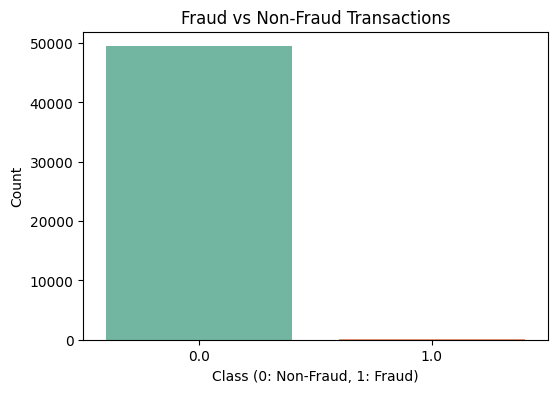

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class', palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

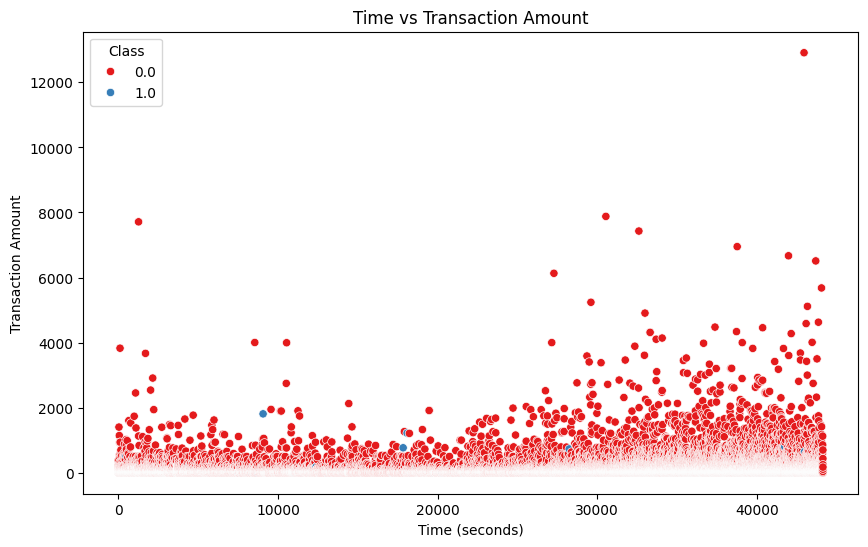

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-12-f8171811a4fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')


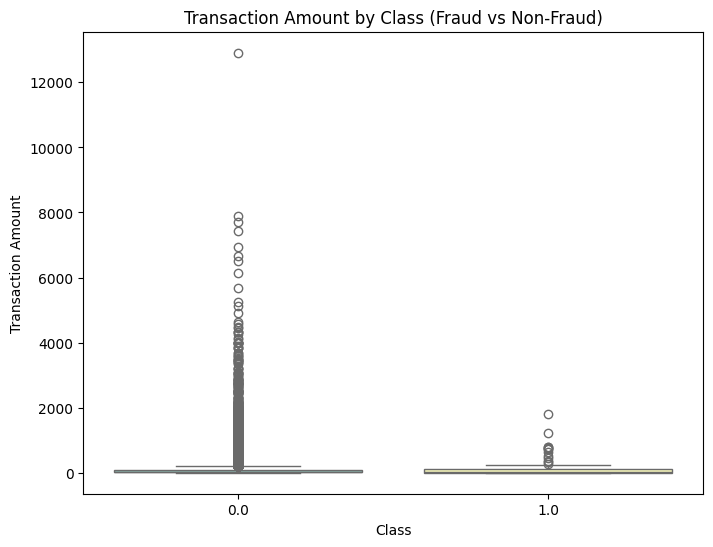

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,49461
1.0,148


In [ ]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]


In [ ]:
print(legit.shape)
print(fraud.shape)

(49461, 31)
(148, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,49461.000000
mean,93.099593
std,253.325102
min,0.000000
25%,7.680000
50%,25.000000
75%,85.000000
max,12910.930000


In [ ]:
fraud.Amount.describe()

,Amount
count,148.000000
mean,100.170676
std,233.347471
min,0.000000
25%,1.000000
50%,9.560000
75%,99.990000
max,1809.680000


In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28809.010473,-0.220239,-0.003947,0.726173,0.167967,-0.240785,0.111250,-0.096470,0.042413,0.134593,...,0.046113,-0.031134,-0.106800,-0.039391,0.008275,0.135623,0.020410,0.003001,0.004455,93.099593
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30601,36004,-0.427382,-0.221045,0.922087,-1.528362,0.227657,1.674364,0.195846,0.521954,-1.808838,...,-0.112041,0.095688,0.189280,-1.315898,-0.418847,1.128283,-0.002805,-0.011610,96.00,0.0
3925,3527,1.157275,0.065588,0.266576,1.208155,-0.051284,0.295924,-0.149182,0.237058,0.273665,...,-0.092536,-0.119307,-0.091551,-0.327413,0.630519,-0.304314,0.027472,-0.001778,1.49,0.0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0.0
12704,22274,1.217837,-0.039447,-0.644115,0.177324,1.907682,3.654217,-0.872431,0.831572,1.466914,...,-0.056280,-0.064007,-0.128819,0.948170,0.661870,-0.322394,0.015015,0.022534,30.24,0.0
5353,5284,-1.562844,0.727090,1.730582,-0.342290,0.996879,-0.665316,0.690645,-0.259661,0.913399,...,-0.184144,-0.109484,-0.450322,0.178427,0.370918,0.214123,-0.329706,-0.063056,9.39,0.0


In [ ]:
new_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,29173.156250,-1.926968,1.279065,-1.901686,1.520027,-1.498282,-0.351263,-1.921535,0.856078,-0.776967,...,0.148989,-0.108356,-0.104149,-0.070401,0.162768,0.055918,0.140717,0.009883,96.053938,0.231250
std,12931.937683,5.338107,3.275972,6.340876,2.982027,4.041929,1.720669,4.834582,3.356423,2.223053,...,1.064167,0.685027,0.963314,0.597063,0.631846,0.486577,0.743179,0.408004,218.229442,0.421962
min,74.000000,-30.552380,-6.713631,-31.103685,-3.958526,-22.105532,-4.977692,-21.922811,-23.632502,-9.283925,...,-11.273890,-3.050007,-19.254328,-2.117488,-4.781606,-1.055997,-4.060814,-2.754982,0.000000,0.000000
25%,21410.500000,-1.852469,-0.362131,-1.144314,-0.357720,-1.327874,-0.994245,-1.097681,-0.122491,-1.395707,...,-0.210299,-0.523609,-0.238911,-0.425923,-0.160777,-0.300407,-0.052829,-0.009225,4.980000,0.000000
50%,33893.500000,-0.551457,0.355890,0.433792,0.635401,-0.461043,-0.234875,-0.327200,0.149080,-0.268740,...,-0.025997,-0.069085,-0.070773,0.037018,0.190542,-0.062459,0.027336,0.026587,29.500000,0.000000
75%,39422.250000,1.084290,1.467407,1.181752,2.387695,0.319698,0.351166,0.322283,0.658571,0.538532,...,0.310161,0.302675,0.077112,0.371363,0.465332,0.367684,0.230389,0.116056,97.292500,0.000000
max,44097.000000,1.625070,16.713389,3.191962,11.927512,5.269255,6.974710,9.503312,20.007208,5.020073,...,9.939343,3.661957,3.982060,1.132342,2.208209,1.537331,3.319267,4.076795,2000.000000,1.000000


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,148


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,29863.815041,-0.197880,0.024719,0.654189,0.190547,-0.240014,0.229144,-0.072308,-0.011242,0.068349,...,-0.003522,-0.072965,-0.073170,-0.049827,-0.066090,0.137507,0.025969,0.001605,0.003633,94.815569
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
30601,36004,-0.427382,-0.221045,0.922087,-1.528362,0.227657,1.674364,0.195846,0.521954,-1.808838,...,-0.335803,-0.112041,0.095688,0.189280,-1.315898,-0.418847,1.128283,-0.002805,-0.011610,96.00
3925,3527,1.157275,0.065588,0.266576,1.208155,-0.051284,0.295924,-0.149182,0.237058,0.273665,...,-0.275301,-0.092536,-0.119307,-0.091551,-0.327413,0.630519,-0.304314,0.027472,-0.001778,1.49
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
12704,22274,1.217837,-0.039447,-0.644115,0.177324,1.907682,3.654217,-0.872431,0.831572,1.466914,...,0.007006,-0.056280,-0.064007,-0.128819,0.948170,0.661870,-0.322394,0.015015,0.022534,30.24
5353,5284,-1.562844,0.727090,1.730582,-0.342290,0.996879,-0.665316,0.690645,-0.259661,0.913399,...,-0.229116,-0.184144,-0.109484,-0.450322,0.178427,0.370918,0.214123,-0.329706,-0.063056,9.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46909,42985,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,0.058861,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00
46918,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,-0.562264,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00
46998,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.168891,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27
47802,43369,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,-0.036837,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00


In [ ]:
Y

,Class
30601,0.0
3925,0.0
113,0.0
12704,0.0
5353,0.0
...,...
46909,1.0
46918,1.0
46998,1.0
47802,1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(640, 30) (512, 30) (128, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.986328125


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9765625


In [ ]:
def evaluate_model(model, name):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("-" * 60)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    evaluate_model(model, name)

try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    evaluate_model(xgb_model, "XGBoost")
except ImportError:
    print("XGBoost not installed. Skipping XGBoost model.")

In [2]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc(model, X_test, Y_test, name):
    fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]):.2f})')

In [ ]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(classification_report(Y_test, Y_pred))
    plot_conf_matrix(Y_test, Y_pred, name)
    plot_roc(model, X_test, Y_test, name)

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
Y_pred = best_model.predict(X_test)
print("\nTuned Random Forest")
print(classification_report(Y_test, Y_pred))
plot_conf_matrix(Y_test, Y_pred, "Tuned Random Forest")

